# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [242]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [243]:
heroes_df.drop(heroes_df.columns[0], axis=1, inplace=True)
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [244]:
heroes_df.info()
powers_df.info()
#heroes_df.mean()
#heroes_df.isna().sum()
powers_df.isna().sum()

# for col in heroes_df.columns:
#     print(heroes_df[col].unique())

# for col in powers_df.columns:
#     print(powers_df[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [245]:
heroes_df.columns  # name is lower case.  Will wait to change it when we join

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [246]:
# Remove Duplicates

# look for duplicates, we have 19 duplicate names
len(heroes_df['name'].unique()) - len(heroes_df)

# We have 1 duplicate index/row
heroes_df.duplicated().sum()
heroes_df.drop_duplicates(keep='first', inplace=True)

# There was one duplicate row which has been removed
heroes_df.duplicated().sum()


# Dupes for power
powers_df.duplicated().sum()  # Great.  This df looks good. All values are names or booleans, no duplicates.



0

In [247]:
# GENDER

heroes_df['Gender'].isna().sum() # Gender has no NaN values
heroes_df['Gender'].unique()  # Gender contains 3 values
len(heroes_df[heroes_df['Gender'] == '-']) / len(heroes_df)

# The '-' value might indicate unknown or other values.  
# I will keep this as it might be useful to indicate representation of non-binary heroes.
# It only makes up 4 percent of the data if we need to later remove it

# If I knew more about reason for missing data, I might replace it with Other or "Not Provided"



0.03956343792633015

Eye color data cleaning.

In [248]:
# EYE COLOR
# contains unknown or missing data
# We will just distribute via random choice based on current distributions

heroes_df['Eye color'].unique()  
heroes_df[heroes_df['Eye color'] == '-']
# Unknown eyecolor '-' accounts for 171/723 of the data.  We won't drop those

eyecolor_rel_prob = heroes_df['Eye color'].value_counts(normalize=True).drop(index=['-'])
eyecolor_rel_prob

colors = list(eyecolor_rel_prob.index)
probs = [i/sum(eyecolor_rel_prob) for i in eyecolor_rel_prob.values]
# print(colors, probs)

def impute_eyecolor(value):
    if value == 'Human' or value == '-':
        return np.random.choice(colors, p=probs)
    else:
        return value
    
heroes_df['Eye color'] = heroes_df['Eye color'].map(lambda x: impute_eyecolor(x))
# heroes_df['Eye color'].unique()

# Also need to fix 'bown'
heroes_df.loc[heroes_df['Eye color'] == 'bown', 'Eye color'] = "brown"


Hair color data cleaning.

In [249]:
# HAIR COLOR
# Lets do similar replacement strategy for hair color


# Replace Brownn with Brown
heroes_df.loc[heroes_df['Hair color'] == 'Brownn', 'Hair color'] = 'brown'

# Make all lower case
# There are also two blonds. "Blond" and "blond"
heroes_df['Hair color'] = heroes_df['Hair color'].map(lambda x: x.lower())
heroes_df["Hair color"].unique() 

# Replace '-' with distribution of hair colors
hair_rel_prob = heroes_df['Hair color'].value_counts(normalize=True)
hair_rel_prob = hair_rel_prob.drop(['-'])
hair_rel_prob

colors = list(hair_rel_prob.index)
probs = [i/sum(hair_rel_prob) for i in hair_rel_prob.values]
#print(colors, probs)

def impute_haircolor(value):
    if value in ['Human', '-']:
        return np.random.choice(colors, p=probs)
    else:
        return value
 

# Impute the changes
heroes_df['Hair color'] = heroes_df['Hair color'].map(lambda x: impute_haircolor(x))


Race col data cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 732
Data columns (total 10 columns):
name          207 non-null object
Gender        207 non-null object
Eye color     207 non-null object
Race          207 non-null object
Hair color    207 non-null object
Height        207 non-null float64
Publisher     203 non-null object
Skin color    207 non-null object
Alignment     207 non-null object
Weight        207 non-null float64
dtypes: float64(2), object(8)
memory usage: 17.8+ KB


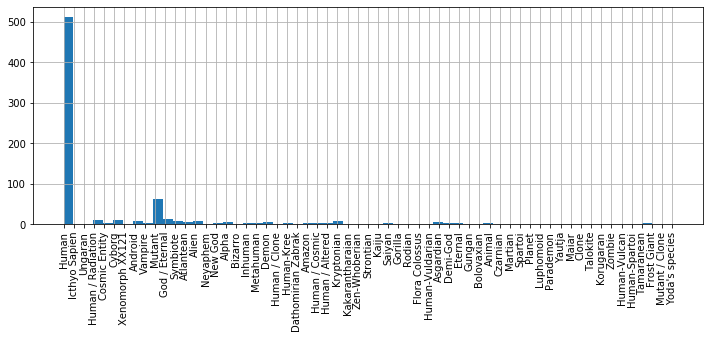

In [250]:
# RACE

heroes_df['Race'].unique()
heroes_df[heroes_df['Race'] == '-']  # lots of them
heroes_df[heroes_df['Race'] == 'Human'].info()

#heroes_df['Race'].hist(figsize=(12,4), xrot=90, bins=len(heroes_df['Race'].unique()))

# Unknown race seems to make up the largest group of heroes.  Can't get rid of it.  
#. We will replace with Human since the overwhelming majority match human.

heroes_df.loc[heroes_df['Race'] == '-', 'Race'] = 'Human'
heroes_df['Race'].hist(figsize=(12,4), xrot=90, bins=len(heroes_df['Race'].unique()))


Height data cleaning
Will clean by replacing negative values with the median.  Extreme tall outliers were motivation for choosing median over mean.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 733
Data columns (total 10 columns):
name          733 non-null object
Gender        733 non-null object
Eye color     733 non-null object
Race          733 non-null object
Hair color    733 non-null object
Height        733 non-null float64
Publisher     718 non-null object
Skin color    733 non-null object
Alignment     733 non-null object
Weight        731 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.0+ KB
183.0
THIS>>>> 0
AND>>>> 0
0      203.0
1      191.0
2      185.0
3      203.0
4      183.0
       ...  
729    165.0
730    304.8
731     66.0
732    170.0
733    185.0
Name: Height, Length: 733, dtype: float64


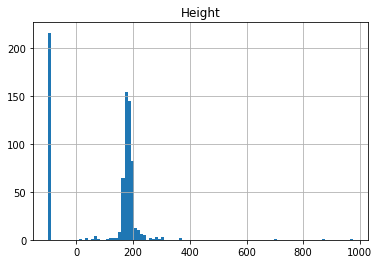

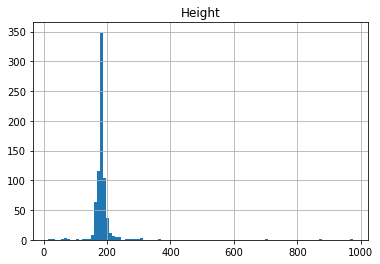

In [251]:
# HEIGHT FIX

heroes_df.info()  # no NaN
#heroes_df = heroes_df['Height'].map(lambda x: float(x))
heroes_df.hist('Height', bins=100)  # see some in the negative

# lets reset the height to the median.  I want the median over the mean because of the extreme tall outliers
height_median = heroes_df[heroes_df["Height"] > 0].median()[0]
print(height_median)  # 183

print("THIS>>>>", heroes_df['Height'].isna().sum())

heroes_df.loc[heroes_df["Height"] < 0, "Height"] = height_median
heroes_df.hist('Height', bins=100)  # see some in the negative

# heroes_df.loc[heroes_df['Height'].isna(), 'Height'] = height_median

values={'Height': height_median}
heroes_df.fillna(value=values)  # THIS FUNCTION NEXT TIME!!!


print("AND>>>>", heroes_df['Height'].isna().sum())
print(heroes_df['Height'])

2

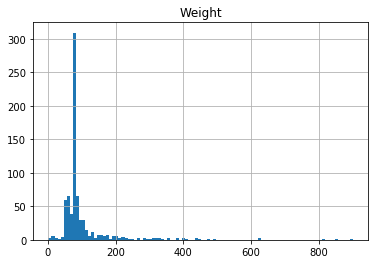

In [252]:
# WEIGHT FIX
# replace with median value


weight_mean = heroes_df[heroes_df['Weight'] > 0]['Weight'].median()
heroes_df.loc[heroes_df['Weight'] < 0, 'Weight'] = weight_mean 
heroes_df.hist("Weight", bins=100)

heroes_df['Weight'].isna().sum()


Clean publisher data
If there is no publisher, I deleted the data rows.  Without a publisher, it would not be considered a superhero comic.

Example: Chuck Norris with no other data.


In [253]:
# PUBLISHER CLEAN
heroes_df.columns
heroes_df = heroes_df[heroes_df['Publisher'].notna()]
heroes_df['Publisher'].unique()

heroes_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 733
Data columns (total 10 columns):
name          718 non-null object
Gender        718 non-null object
Eye color     718 non-null object
Race          718 non-null object
Hair color    718 non-null object
Height        718 non-null float64
Publisher     718 non-null object
Skin color    718 non-null object
Alignment     718 non-null object
Weight        718 non-null float64
dtypes: float64(2), object(8)
memory usage: 61.7+ KB


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [254]:
print(len(powers_df), len(heroes_df))
powers_df_tojoin = powers_df.set_index('hero_names')
heroes_df_tojoin = heroes_df.set_index('name')
heroes_df_tojoin

joined_df = heroes_df.join(powers_df)
# print(len(joined_df))
joined_df.duplicated(keep='first')
joined_df.info()
joined_df.head()       

667 718
<class 'pandas.core.frame.DataFrame'>
Int64Index: 718 entries, 0 to 733
Columns: 178 entries, name to Omniscient
dtypes: float64(2), object(176)
memory usage: 1.0+ MB


,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,no hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,no hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,no hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,no hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,black,183.0,Marvel Comics,-,bad,81.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

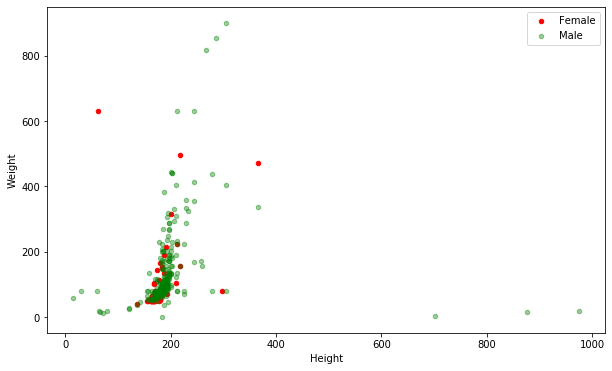

In [255]:
female_df = joined_df[joined_df['Gender'] == "Female"]
female_df.head()

male_df = joined_df[joined_df['Gender'] == "Male"]
male_df.head()

ax1 = female_df.plot.scatter(x='Height', y='Weight', color='red', figsize=(10,6), alpha=1, label="Female")
male_df.plot.scatter(x='Height', y='Weight', color='green', ax=ax1, alpha=0.4, label="Male")


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [256]:
import seaborn as sns
male_heroes_df = male_df
female_heroes_df = female_df


def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe[column_name])
    


count    493.000000
mean     189.856998
std       58.316233
min       15.200000
25%      183.000000
50%      183.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64

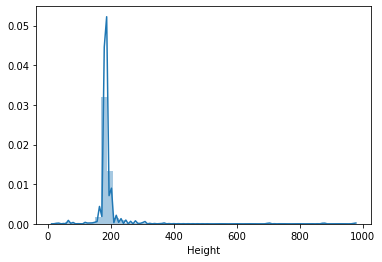

In [257]:
# Male Height
show_distplot(male_heroes_df, "Male", "Height")
#sns.distplot(male_df['Height'])
male_heroes_df["Height"].describe()

count    493.000000
mean     111.645030
std       94.154743
min        2.000000
25%       81.000000
50%       81.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64

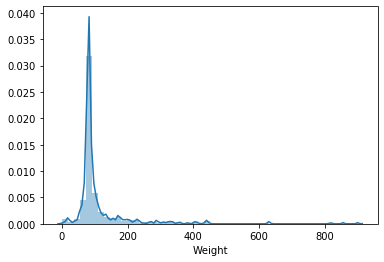

In [258]:
# Male Weight
show_distplot(male_heroes_df, "Male", "Weight")
male_heroes_df["Weight"].describe()

count    198.000000
mean     176.952020
std       20.528894
min       62.500000
25%      168.000000
50%      175.000000
75%      183.000000
max      366.000000
Name: Height, dtype: float64

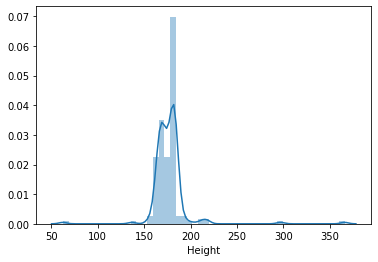

In [259]:
# Female Height
show_distplot(female_heroes_df, "Female", "Height")
female_heroes_df["Height"].describe()

count    198.000000
mean      79.449495
std       65.129819
min       41.000000
25%       55.000000
50%       62.500000
75%       81.000000
max      630.000000
Name: Weight, dtype: float64

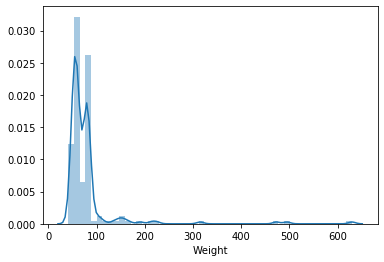

In [260]:
# Female Weight
show_distplot(female_heroes_df, "Female", "Weight")
female_heroes_df["Weight"].describe()

Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________

Height and weight was greater for male superheroes and had a greater variance.  There is a clear problem with the female distribution.  When we replaced missing height and weight data in our original dataset, we chose to replace the missing data with the median data of the entire set.  There appears likely correlation between gender and weight/height, so this was a flawed method for cleaning the data if gender was to be used to differentiate. This creates the false second bump in the female graphs.


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [261]:
joined_df.head()
print(joined_df.columns[11:])

joined_df.iloc[:, 11:].sum().sort_values().tail()

# Five most common powers are the boring ones


Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)


Agility           239.0
Super Speed       243.0
Durability        251.0
Stamina           282.0
Super Strength    351.0
dtype: float64

In [262]:
#joined_df.groupby(['Publisher']).head()
#joined_df.head()
marvel_df = joined_df[joined_df['Publisher'] == 'Marvel Comics']

marvel_df.iloc[:, 11:].sum().sort_values().tail()
#.iloc[:, 11:].sum().sort_values()



Agility           113.0
Super Speed       131.0
Durability        138.0
Stamina           142.0
Super Strength    194.0
dtype: float64

In [263]:
dc_df = joined_df[joined_df['Publisher'] == 'DC Comics']

dc_df.iloc[:, 11:].sum().sort_values().tail()
#.iloc[:, 11:].sum().sort_values()



Super Speed       75.0
Durability        76.0
Agility           81.0
Stamina           91.0
Super Strength    97.0
dtype: float64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________
The five most common powers are the same for both leading comic book companies.  The order is only slightly different.  The different publishers seem to create similar superheroes.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

What is the relationship between the number of powers and the alignment of the character?  What does the distribution look like?


Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [264]:
joint_df['Align'].unique()

NameError: name 'joint_df' is not defined

In [286]:
# make a column for number of powers
joined_df["number_powers"] = joined_df.iloc[: ,11:178].sum(axis=1)
joined_df.head()

joined_df.iloc[0, 11:178].sum()
joined_df.shape

# # if they have no powers, they likely were all NaNs from the join
powered_df = joined_df[joined_df['number_powers'] > 0]


# # split up my good and bad supers
good_df = powered_df.loc[powered_df['Alignment'] == 'good', :]
bad_df = powered_df.loc[powered_df['Alignment'] == 'bad', :]
good_df['number_powers'].max()




49.0

count    438.000000
mean       9.066210
std        7.630044
min        1.000000
25%        4.000000
50%        7.000000
75%       12.750000
max       49.000000
Name: number_powers, dtype: float64

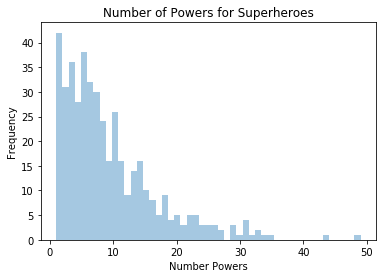

In [294]:
# Histogram
# ax = good_df.hist('number_powers', bins=int(good_df['number_powers'].max()))

# Seaborn distplot of same data
sns.distplot(good_df['number_powers'], bins=int(good_df['number_powers'].max()), kde=False)
plt.title("Number of Powers for Superheroes")
plt.xlabel("Number Powers")
plt.ylabel("Frequency")

good_df['number_powers'].describe()



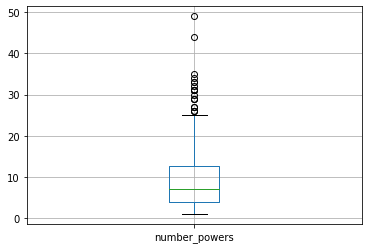

In [292]:
good_df.boxplot('number_powers')

count    186.000000
mean       8.403226
std        6.618058
min        1.000000
25%        3.000000
50%        7.000000
75%       12.000000
max       35.000000
Name: number_powers, dtype: float64

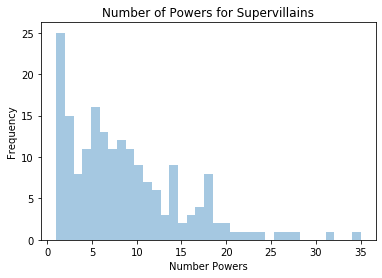

In [289]:
# Seaborn distplot of same data
sns.distplot(bad_df['number_powers'], kde=False, bins=int(bad_df['number_powers'].max()))
plt.title("Number of Powers for Supervillains")
plt.xlabel("Number Powers")
plt.ylabel("Frequency")

bad_df['number_powers'].describe()

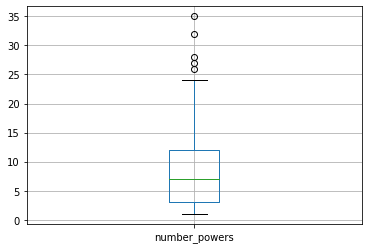

In [293]:
bad_df.boxplot('number_powers')

Conclusion:
Supervillains on average have slightly fewer powers than superheroes.  Both groups have histogram plots for the number of powers that skew right, with superheroes have a greater standard deviation of powers.  The most common number of powers for both groups is 1, but outliers in both groups have more than 20 or 30 powers each.

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data